# Problem Statement :

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 

There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.

Output: Number of predicted wins (W)

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# Getting the dataset

df=pd.read_csv("baseball.csv")
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Displaying the first 10 rows of the dataset

Now let's understand the various features of this dataset :

W : Output feature, Number of predicted wins 

R : Runs scored

AB : At bat, plate appearances

H : Hit,reaching base because of a batted, fair ball without error by the defense

2B : Double, hits on which the batter reaches second base safely

3B : Triple, hits on which the batter reaches third base safely

HR : Home runs, hits on which the batter successfully touched all four bases

BB : Base on balls (also called a "walk")

SO : Strike out, number of times that a third strike is taken

SB : Stolen base, number of bases advanced by the runner while the ball is in the possession of the defense

RA : Run average, number of runs allowed times nine divided by innings pitched

ER : Earned run, number of runs that did not occur as a result of errors

ERA : Earned run average, total number of earned runs

CG : Complete game, number of games where player was the only pitcher for their team

SHO : Shutout, number of complete games pitched with no runs allowed

SV : Save, number of games where the pitcher enters a game led by the pitcher's team

E : Errors, number of times a fielder fails to make a play he should have made with common effort

# Exploratory Data Analysis :

In [3]:
# Checking the features of the dataset

df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here, we can observe that it is difficult to know the meaning of the columns with these names, so instead we can change them to names that are understandable.

In [4]:
# Changing the column names

df.rename(columns={'W':'Wins',
                  'R' :'Runs',
                  'AB':'At Bat',
                  'H' :'Hit',
                  '2B':'Double',
                  '3B':'Tripple',
                  'HR':'Home Run',
                  'BB':'Base on Balls',
                  'SO':'Strike Out',
                  'SB':'Stolen Base',
                  'RA':'Run Average',
                  'ER':'Earned Run',
                  'ERA':'Earned Run Average',
                  'CG':'Complete Game',
                  'SHO':'Shoutout',
                  'SV':'Save',
                  'E':'Errors'}, inplace=True)

In [5]:
df.head(10)

,Wins,Runs,At Bat,Hit,Double,Tripple,Home Run,Base on Balls,Strike Out,Stolen Base,Run Average,Earned Run,Earned Run Average,Complete Game,Shoutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


So, here we can see that the column names are successfully changed and it will be a little easier to understand them.
I got this information about the dataset from the provided link : https://en.wikipedia.org/wiki/Baseball_statistics

In [6]:
# Checking shape of the dataset

df.shape

(30, 17)

Hence the dataset has 30 rows and 17 columns.

In [7]:
# Checking datatype of the dataset

df.dtypes

Wins                    int64
Runs                    int64
At Bat                  int64
Hit                     int64
Double                  int64
Tripple                 int64
Home Run                int64
Base on Balls           int64
Strike Out              int64
Stolen Base             int64
Run Average             int64
Earned Run              int64
Earned Run Average    float64
Complete Game           int64
Shoutout                int64
Save                    int64
Errors                  int64
dtype: object

So, all the columns are int datatype, except for the 'Earned Run Average' is float datatype

In [8]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hit                 30 non-null     int64  
 4   Double              30 non-null     int64  
 5   Tripple             30 non-null     int64  
 6   Home Run            30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Out          30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Run Average         30 non-null     int64  
 11  Earned Run          30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shoutout            30 non-null     int64  
 15  Save                30 non-null     int64  
 16  Errors    

Here we can observe that all the 30 rows, for all the columns, are non null, that is there are no null values.

And memory used by the dataset is 4.1 KB.

In [9]:
# Checking for null values

df.isnull().sum()

Wins                  0
Runs                  0
At Bat                0
Hit                   0
Double                0
Tripple               0
Home Run              0
Base on Balls         0
Strike Out            0
Stolen Base           0
Run Average           0
Earned Run            0
Earned Run Average    0
Complete Game         0
Shoutout              0
Save                  0
Errors                0
dtype: int64

From here we are sure that there are no null values

We can also visualize and check :

In [10]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

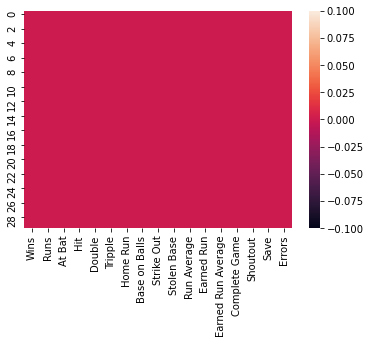

In [11]:
sns.heatmap(df.isnull())

From the above heatmap visualization we can observe that there are no white spaces, hence no null values.

In [12]:
# Checking various factors of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hit,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Double,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Tripple,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Run,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Out,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


Observations :
    
    1. For all the columns count is 30 since there are no null values.
    
    2. Not much variation or difference observed between the mean and median of the columns, hence less probability of skewness.
    
    3. Outliers may be present as there are some difference between the 75th percentile and max value.

In [13]:
# Checking Skewness of the dataset

df.skew()

Wins                  0.047089
Runs                  1.200786
At Bat                0.183437
Hit                   0.670254
Double               -0.230650
Tripple               0.129502
Home Run              0.516441
Base on Balls         0.158498
Strike Out           -0.156065
Stolen Base           0.479893
Run Average           0.045734
Earned Run            0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shoutout              0.565790
Save                  0.657524
Errors                0.890132
dtype: float64

The data is fairly symmetrical if the skewness is between +/-0.5.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness.

If the skewness is less than -1 or greater than 1, the data are highly skewed.

Observations :
    
    1. 'Runs' is highly skewed.
    
    2. 'Complete Game', 'Save', 'Errors', 'Hit' has slight skewness.
    
We can also check through visualization :

<AxesSubplot:xlabel='Runs', ylabel='Density'>

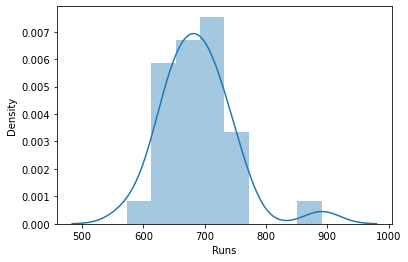

In [14]:
sns.distplot(df['Runs'])

Here we see that 'Runs' is positively skewed.

<AxesSubplot:xlabel='Complete Game', ylabel='Density'>

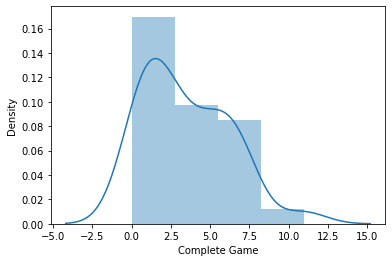

In [15]:
sns.distplot(df['Complete Game'])

Slightly skewed towards positive side

<AxesSubplot:xlabel='Save', ylabel='Density'>

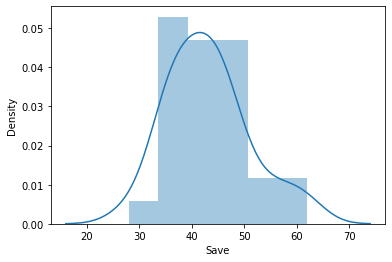

In [16]:
sns.distplot(df['Save'])

<AxesSubplot:xlabel='Errors', ylabel='Density'>

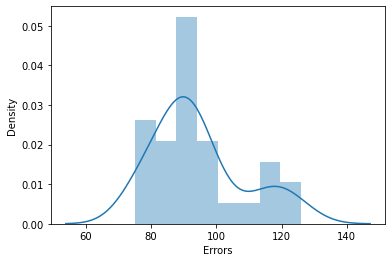

In [17]:
sns.distplot(df['Errors'])

So we need to handle the 'Runs' column as it is highly skewed. But before doing that we need the check the correlation of 'Runs'

In [18]:
# Importing matplotlib for correlation visualization

import matplotlib.pyplot as plt

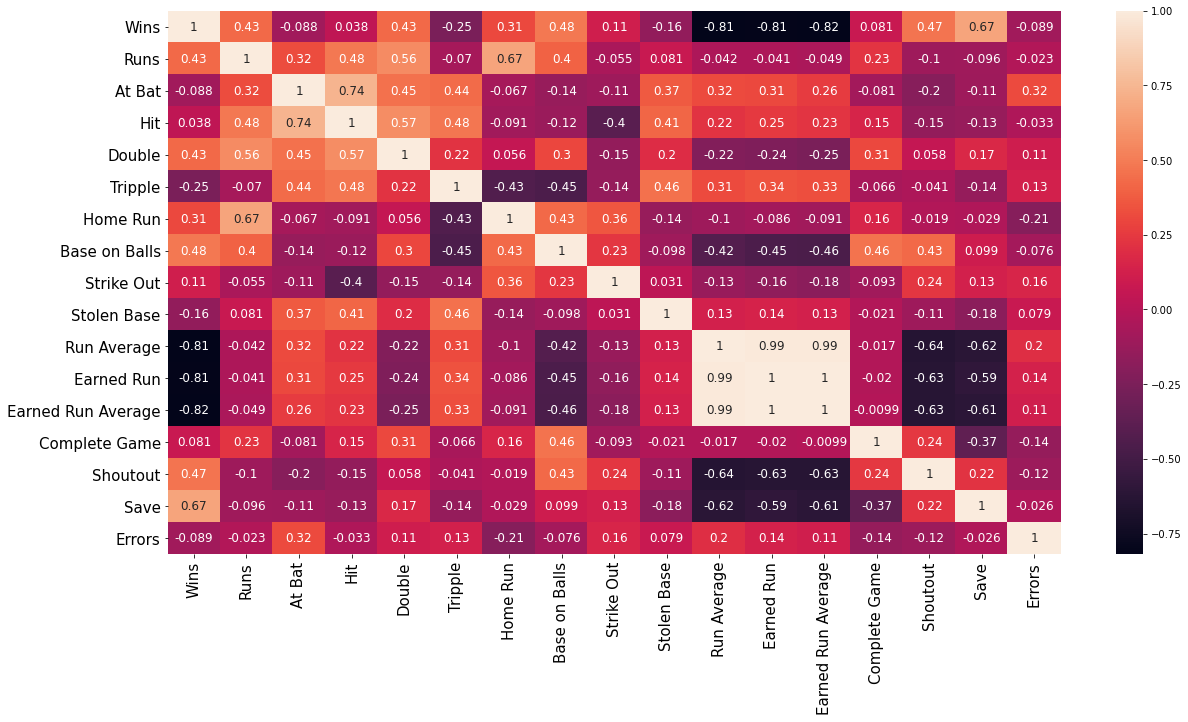

In [19]:
# Checking correlation

corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

As we can observe here that, 'Runs' has a good positive correlation with our output variable, so we don't need to handle its skewness, because handling its skewness will also affect its correlation.

In [20]:
df.nunique()

Wins                  24
Runs                  28
At Bat                29
Hit                   29
Double                22
Tripple               23
Home Run              27
Base on Balls         29
Strike Out            29
Stolen Base           27
Run Average           30
Earned Run            30
Earned Run Average    30
Complete Game          9
Shoutout              12
Save                  20
Errors                21
dtype: int64

There several unique values which denotes that this dataset has no categorical data. Hence this will be the case of Linear Regression, which we'll look later into the project.

# Univariate Analysis :
Distribution plot :

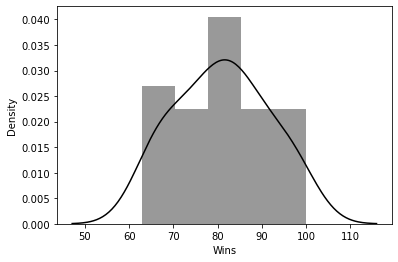

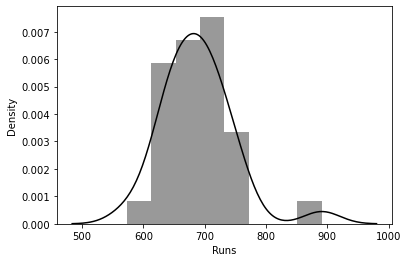

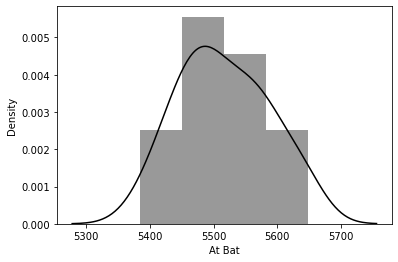

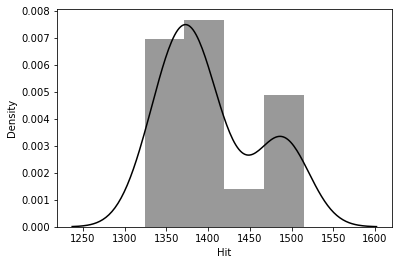

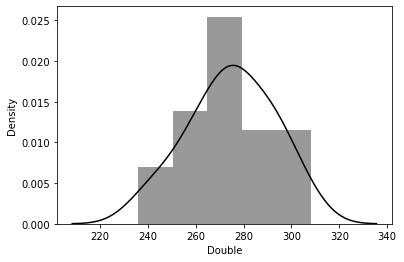

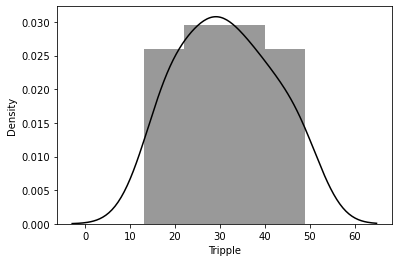

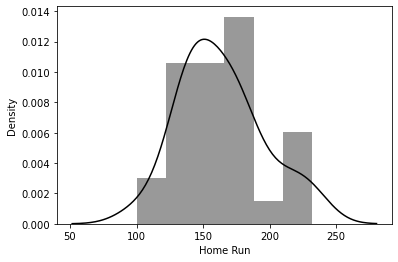

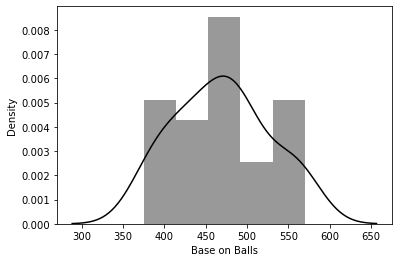

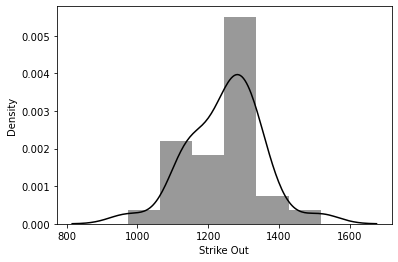

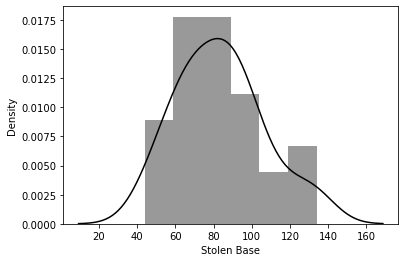

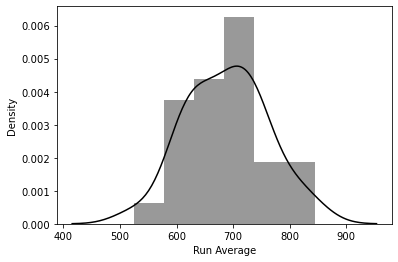

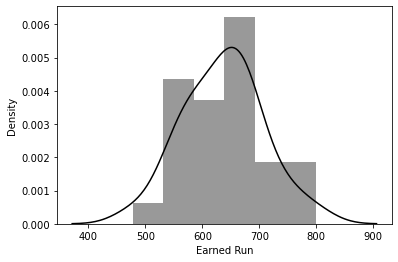

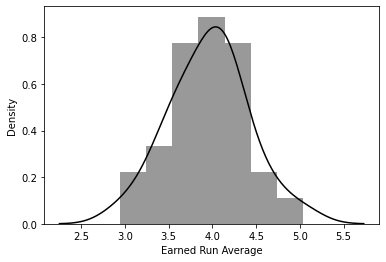

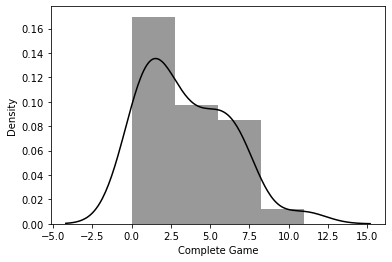

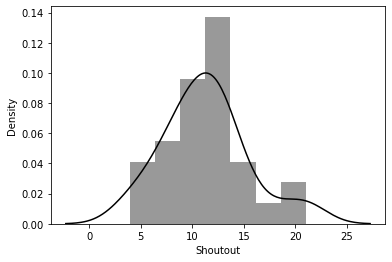

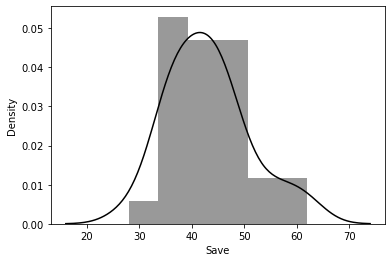

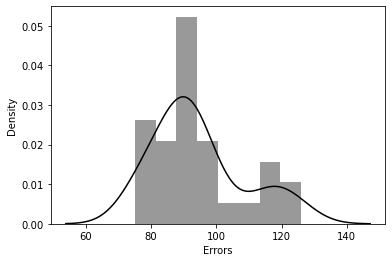

In [21]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], color="k")

So here we observed that there is much skewness in 'Runs'.

And slight skewness in 'Errors', 'Strike Out', and 'Complete Game' and rest of the columns data are normally distributed.

Swarmplot :

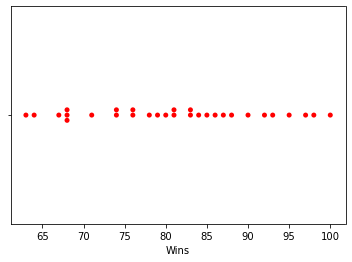

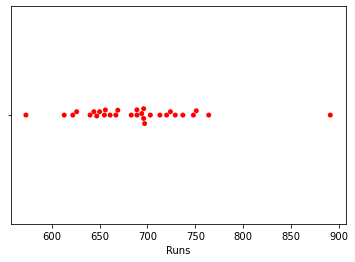

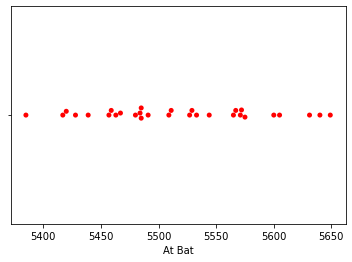

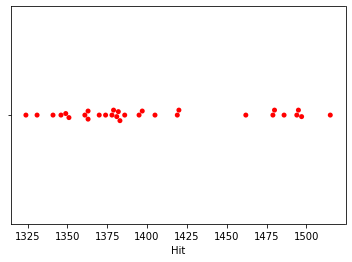

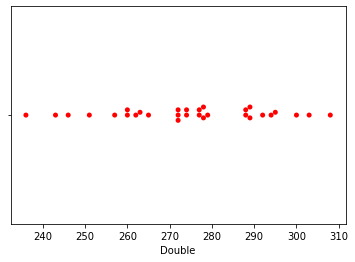

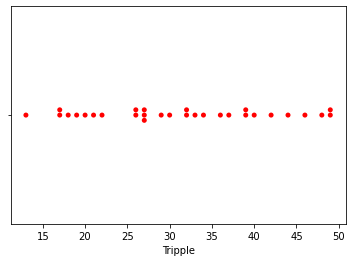

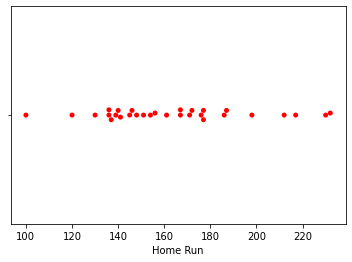

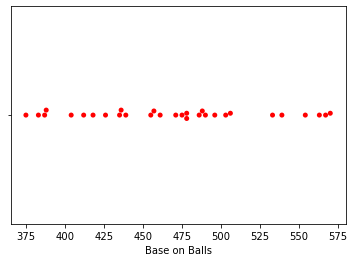

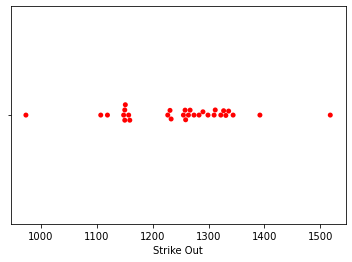

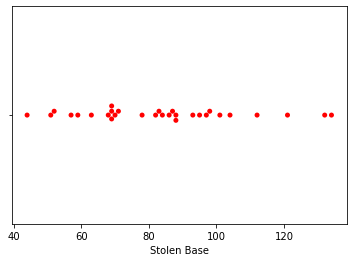

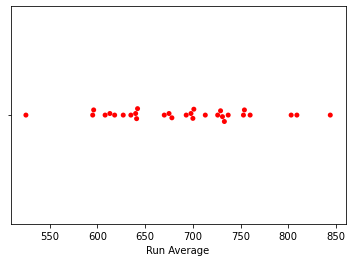

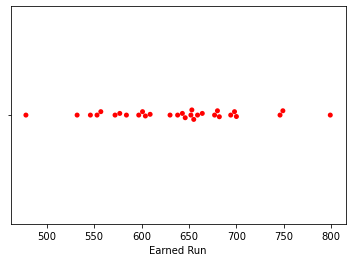

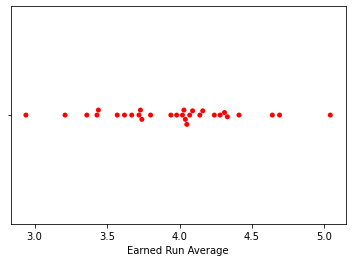

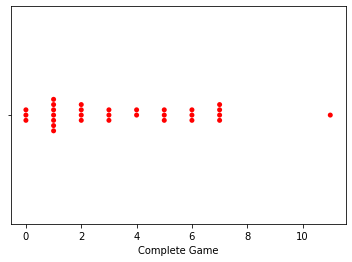

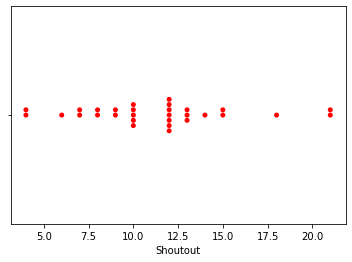

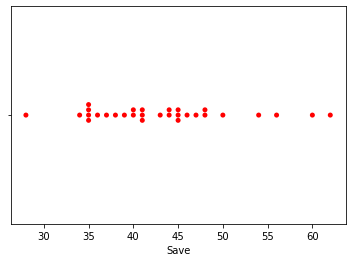

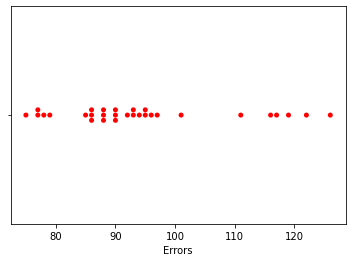

In [22]:
for i in df.columns:
    plt.figure()
    sns.swarmplot(df[i], color='red')

With swarmplot visualization technique, we are able to view the spread of values in this continuous dataset. Swarm-plot spreads out the data points of the variable automatically to avoid overlap.

From here we can observe that most of the datapoints are evenly and closely spread, but in some columns like 'Runs' it is not. These faraway points might be outliers. Similar results are also observed in 'Strike Out' and 'Complete Game'.

Boxplot :

Wins                     AxesSubplot(0.125,0.749828;0.168478x0.130172)
Runs                  AxesSubplot(0.327174,0.749828;0.168478x0.130172)
At Bat                AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Hit                   AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Double                   AxesSubplot(0.125,0.593621;0.168478x0.130172)
Tripple               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Home Run              AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Base on Balls         AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Strike Out               AxesSubplot(0.125,0.437414;0.168478x0.130172)
Stolen Base           AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Run Average           AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Earned Run            AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Earned Run Average       AxesSubplot(0.125,0.281207;0.168478x0.130172)
Complete Game         AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Shouto

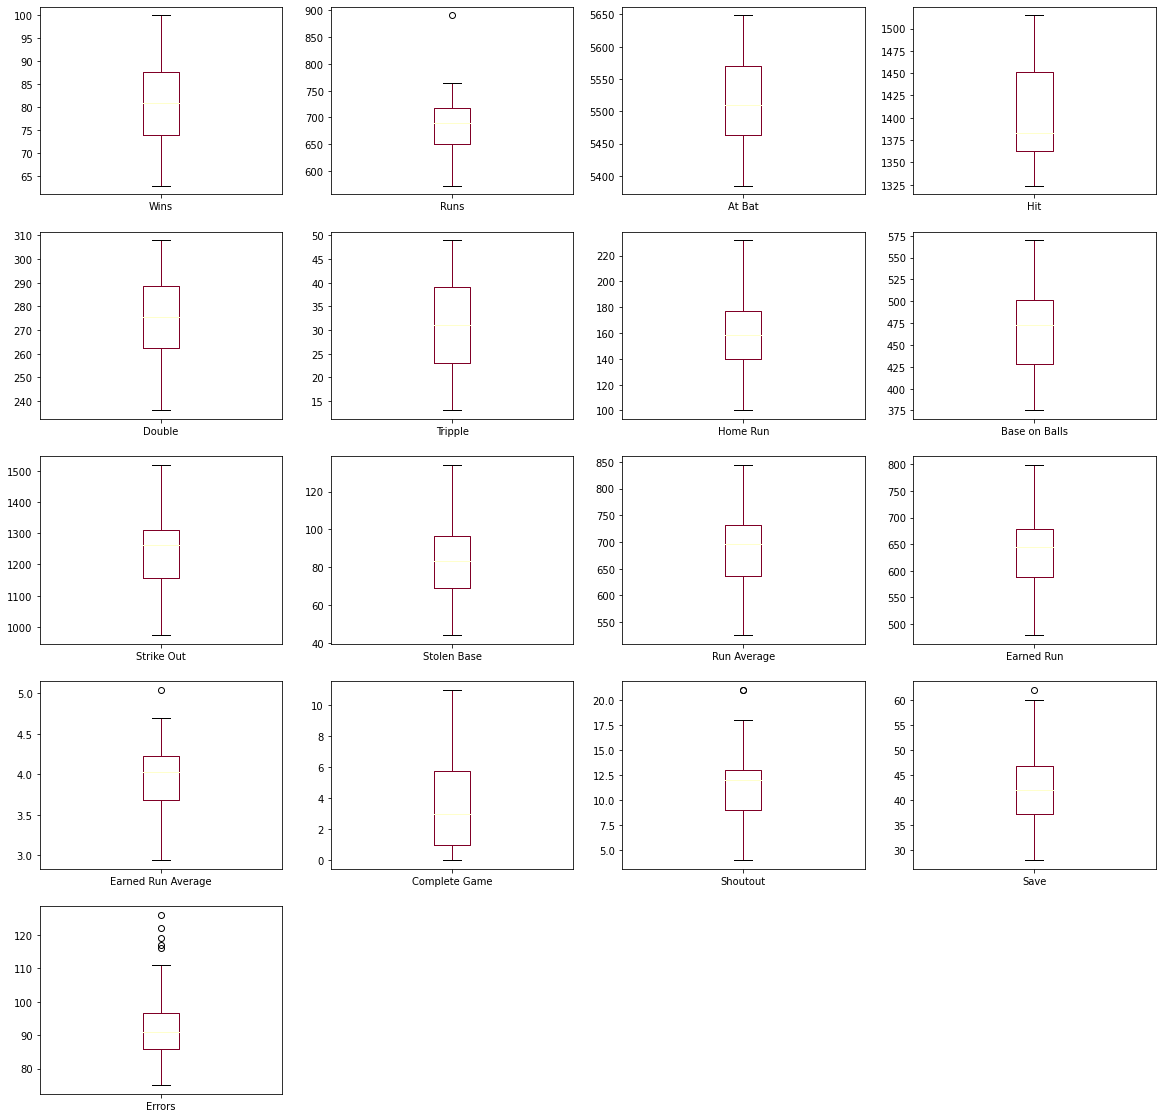

In [23]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,20), colormap='YlOrRd_r')


So from the above boxplot, we can find that some columns definitely has outliers.

Those are :
    
    1. Runs
    2. Earned Run Average
    3. Shoutout
    4. Save
    5. Errors
    
These outliers will be handled in the later part of the project accordingly.

# Bivariate Analysis :

Scatterplot :

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

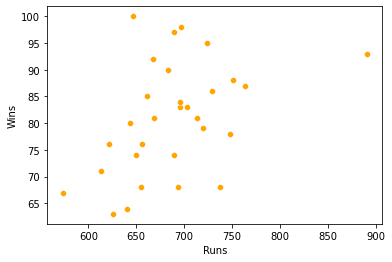

In [24]:
sns.scatterplot(x='Runs',y='Wins', data=df, color='orange')

As the runs are getting higher, wins also got higher

<AxesSubplot:xlabel='At Bat', ylabel='Wins'>

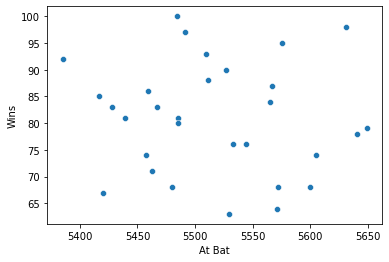

In [25]:
sns.scatterplot(x='At Bat',y='Wins', data=df)

No specific relationship is observed between 'At Bat' and 'Wins'. Data points are scattered all over.

<AxesSubplot:xlabel='Hit', ylabel='Wins'>

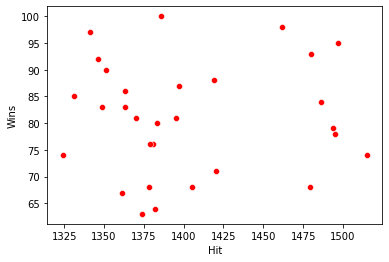

In [26]:
sns.scatterplot(x='Hit',y='Wins', data=df, color='red')

Here we can observe that maximum Hit points are in the range 1350-1425, but at such Wins are not that good

<AxesSubplot:xlabel='Double', ylabel='Wins'>

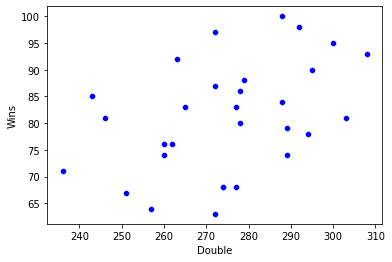

In [27]:
sns.scatterplot(x='Double',y='Wins', data=df, color='blue')

Here we can observe that with the increase in Doubles, Wins are slightly increased.

<AxesSubplot:xlabel='Tripple', ylabel='Wins'>

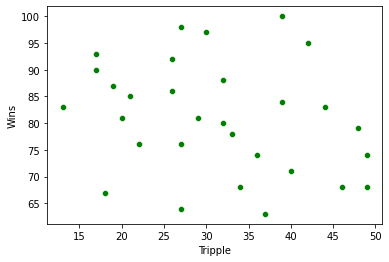

In [28]:
sns.scatterplot(x='Tripple',y='Wins', data=df, color='green')

Here also we are unable to derive any specific relation between Tripple and Wins.

<AxesSubplot:xlabel='Home Run', ylabel='Wins'>

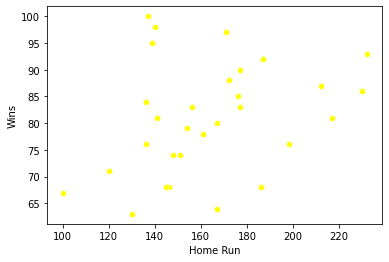

In [29]:
sns.scatterplot(x='Home Run',y='Wins', data=df, color='yellow')

Here we can observe that, with Home Run above 140, we can get good Wins points.

<AxesSubplot:xlabel='Base on Balls', ylabel='Wins'>

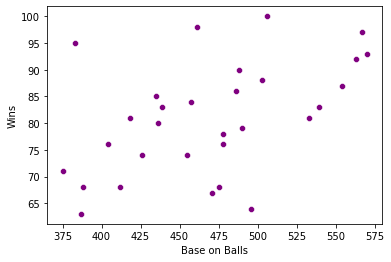

In [30]:
sns.scatterplot(x='Base on Balls',y='Wins', data=df, color='purple')

Here we can observe a slight increase in Wins, with the increase in Base on Balls.

<AxesSubplot:xlabel='Strike Out', ylabel='Wins'>

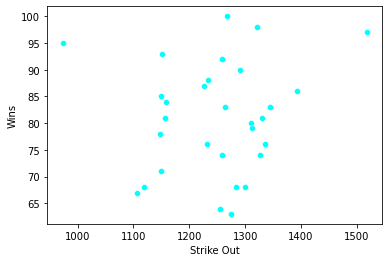

In [31]:
sns.scatterplot(x='Strike Out',y='Wins', data=df, color='cyan')

Here also we can't observe any specific relation.

<AxesSubplot:xlabel='Stolen Base', ylabel='Wins'>

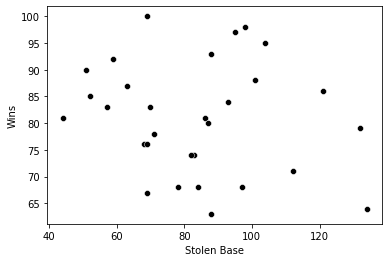

In [32]:
sns.scatterplot(x='Stolen Base',y='Wins', data=df, color='black')

Here we can observe that, with Stolen Base less than 80 or 75, Wins is also very less. For rest of the data points we have a moderate Wins.

<AxesSubplot:xlabel='Run Average', ylabel='Wins'>

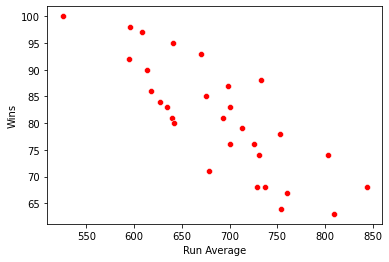

In [33]:
sns.scatterplot(x='Run Average',y='Wins', data=df, color='red')

Here we can clearly observe a negative relation between 'Run Average' and 'Wins'. With the decrease in 'Run Average', 'Wins' is also decreasing.

<AxesSubplot:xlabel='Earned Run', ylabel='Wins'>

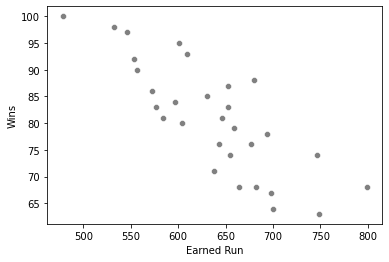

In [34]:
sns.scatterplot(x='Earned Run',y='Wins', data=df, color='grey')

Similarly, here also we can clearly observe a negative relation between 'Earned Run' and 'Wins'. With the decrease in 'Earned Run', 'Wins' is also decreasing.

<AxesSubplot:xlabel='Earned Run Average', ylabel='Wins'>

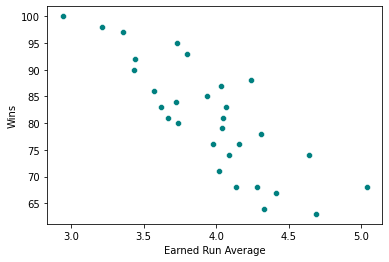

In [35]:
sns.scatterplot(x='Earned Run Average',y='Wins', data=df, color='teal')

Similarly, here also we can clearly observe a negative relation between 'Earned Run Average' and 'Wins'. With the decrease in 'Earned Run Average', 'Wins' is also decreasing.

<AxesSubplot:xlabel='Complete Game', ylabel='Wins'>

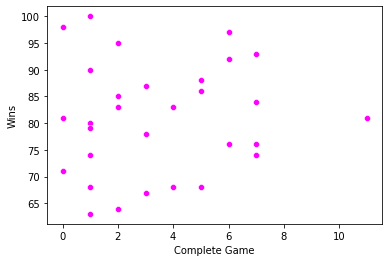

In [36]:
sns.scatterplot(x='Complete Game',y='Wins', data=df, color='magenta')

Here we can observe that above 7 there are no 'Complete Game' and respective 'Wins'.

<AxesSubplot:xlabel='Shoutout', ylabel='Wins'>

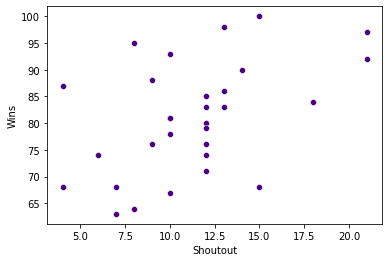

In [37]:
sns.scatterplot(x='Shoutout',y='Wins', data=df, color='indigo')

Here we can observe a positive relation between 'Shoutout' and 'Wins'. With increase in 'Shoutout', chances of 'Wins' also increases.

<AxesSubplot:xlabel='Save', ylabel='Wins'>

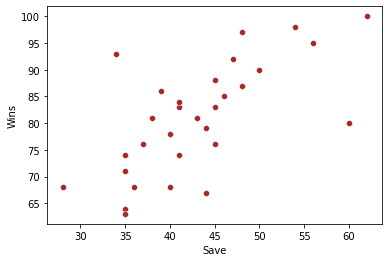

In [38]:
sns.scatterplot(x='Save',y='Wins', data=df, color='brown')

Here we can observe a positive relation between 'Save' and 'Wins'. With increase in 'Save', chances of 'Wins' also increases.

<AxesSubplot:xlabel='Errors', ylabel='Wins'>

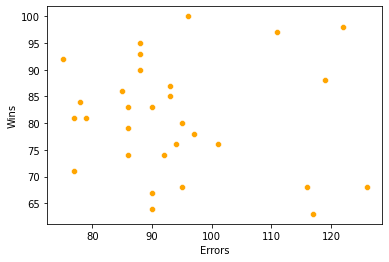

In [39]:
sns.scatterplot(x='Errors',y='Wins', data=df, color='orange')

Here we observe that with less 'Error' range, that is 80-100, 'Wins' is also confined to a less range.

Barplot :

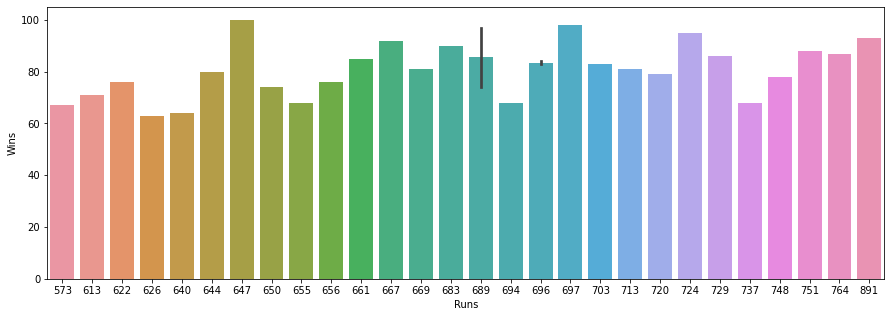

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x="Runs", y="Wins", data=df)
plt.show()

We are unable to relate 'Runs' and 'Wins' as their data points are unevely distributed.

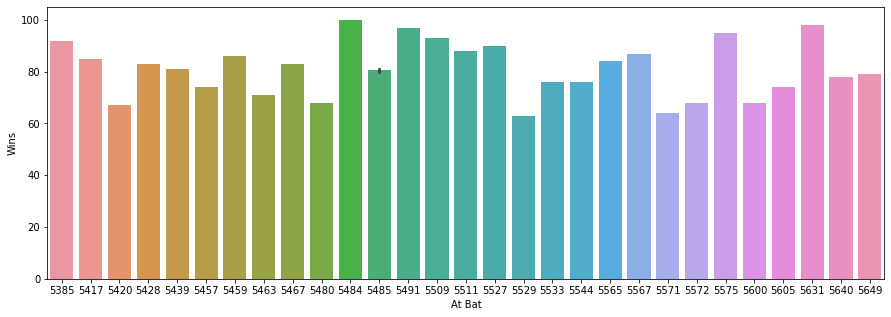

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

Similarly, we are unable to relate 'At Bat' and 'Wins' as their data points are unevely distributed.

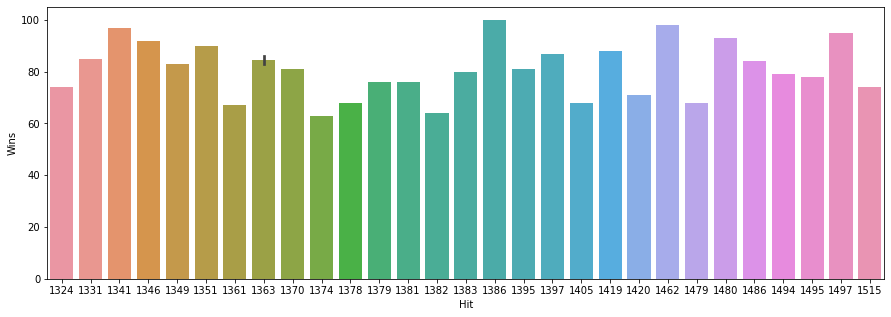

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x="Hit", y="Wins", data=df)
plt.show()

Similarly, here also, 'Hit' and 'Wins' do not show any specific pattern relation.

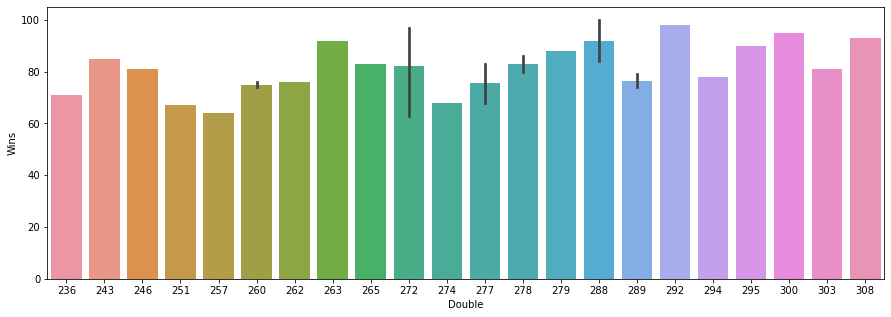

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x="Double", y="Wins", data=df)
plt.show()

Again, here also, 'Double' and 'Wins' do not show any specific pattern relation.

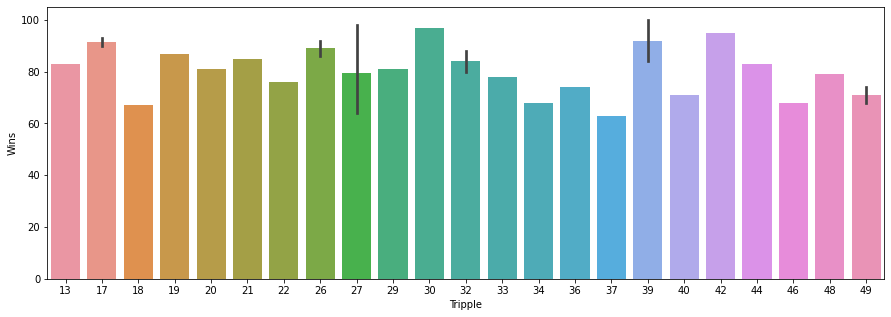

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(x="Tripple", y="Wins", data=df)
plt.show()

Again, here also, 'Tripple' and 'Wins' do not show any specific pattern relation.

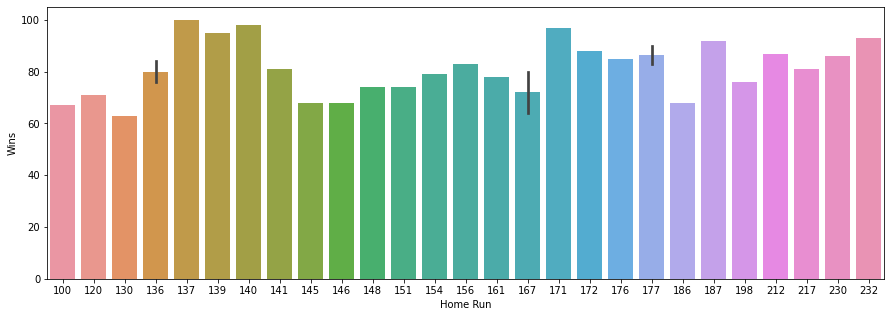

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x="Home Run", y="Wins", data=df)
plt.show()

Again, here also, 'Home Run' and 'Wins' do not show any specific pattern relation.

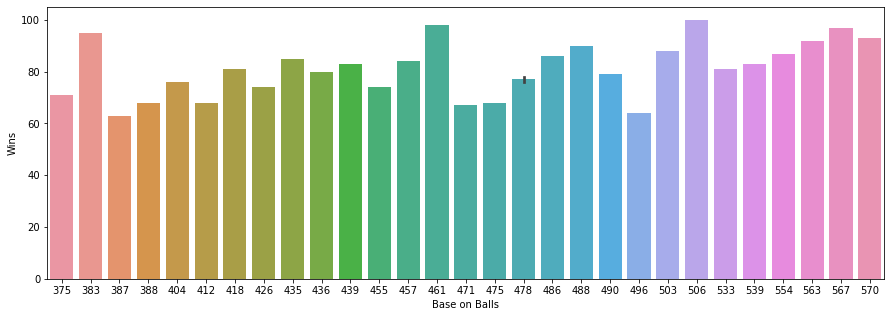

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

Again, here also, 'Base on Balls' and 'Wins' do not show any specific pattern relation.

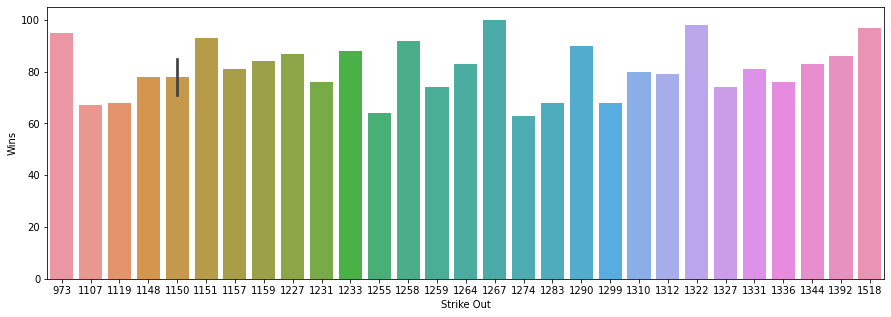

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x="Strike Out", y="Wins", data=df)
plt.show()

Again, here also, 'Strike Out' and 'Wins' do not show any specific pattern relation.

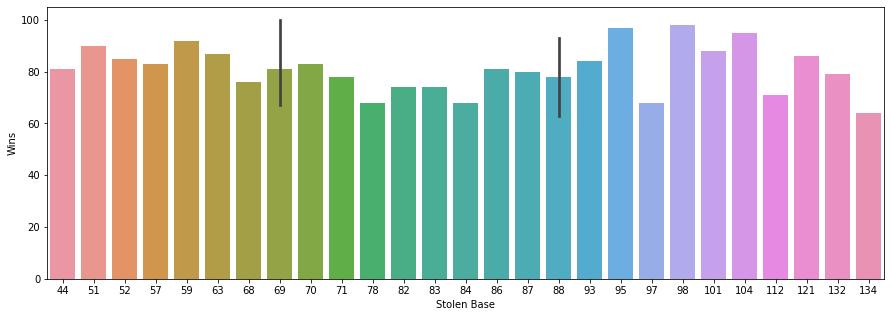

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

Again, here also, 'Stolen Base' and 'Wins' do not show any specific pattern relation.

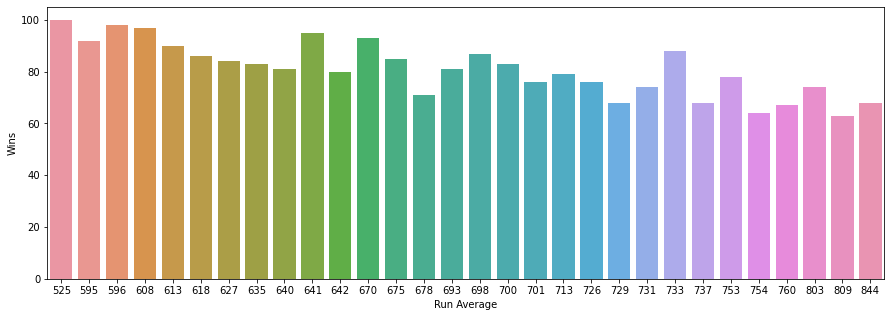

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(x="Run Average", y="Wins", data=df)
plt.show()

Here we can observe a negative relation that is a decreasing pattern between 'Run Average' and 'Wins'.

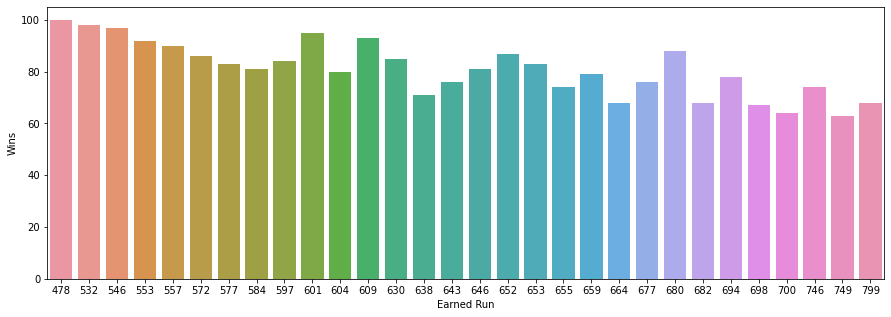

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x="Earned Run", y="Wins", data=df)
plt.show()

Here also we can observe a negative relation that is a decreasing pattern between 'Earned Run' and 'Wins'

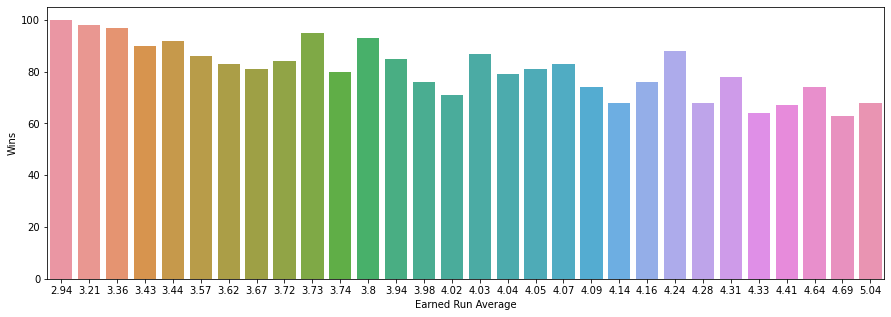

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

Here also we can observe a negative relation that is a decreasing pattern between 'Earned Run Average' and 'Wins'

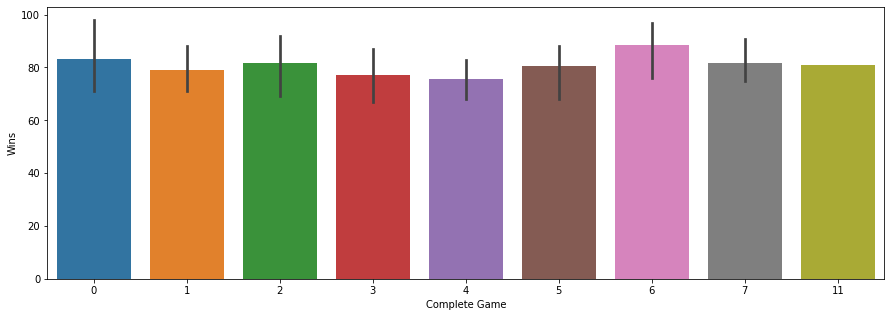

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

No any clear specific pattern visible between 'Complete Name' and 'Wins'

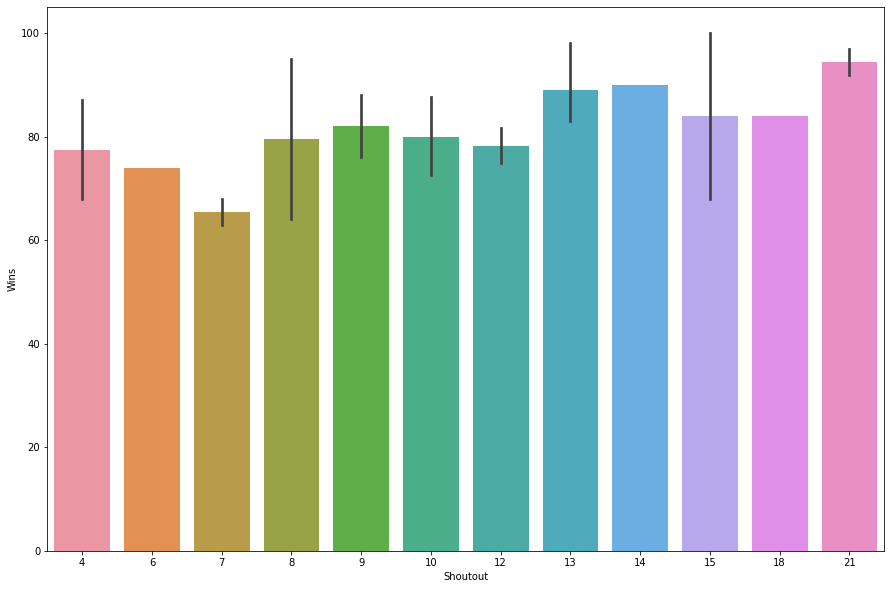

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(x="Shoutout", y="Wins", data=df)
plt.show()

Here we can observe a positive relation that is an increasing pattern between 'Shoutout' and 'Wins'.

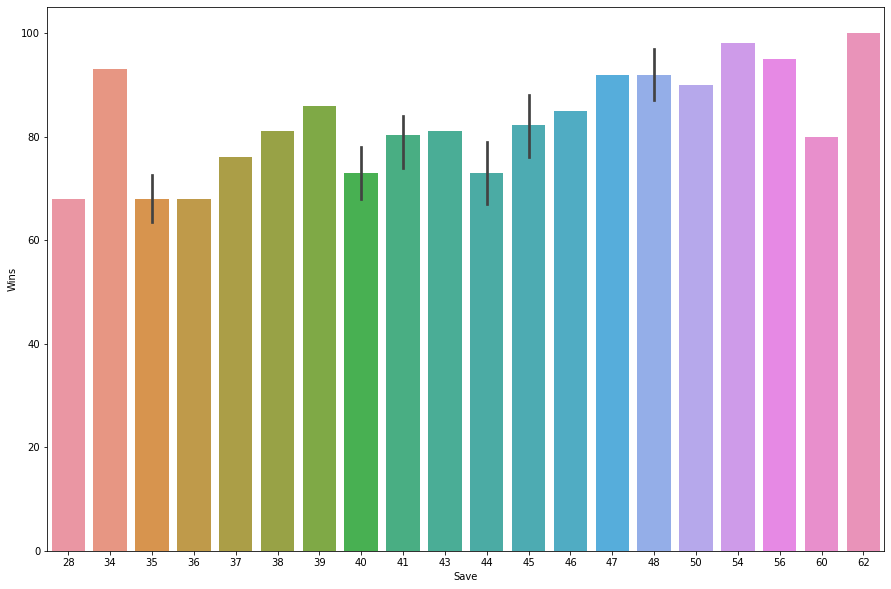

In [54]:
plt.figure(figsize=(15,10))
sns.barplot(x="Save", y="Wins", data=df)
plt.show()

Here also we can observe a positive relation that is a slightly increasing pattern between 'Save' and 'Wins'.

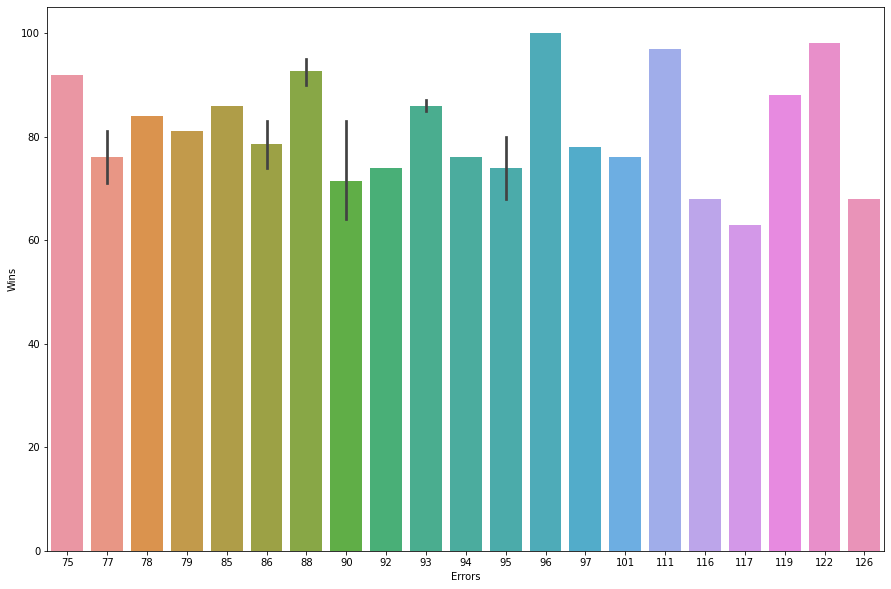

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

No any  clear specific pattern is visible between 'Errors' and 'Wins'.

LM Plot :

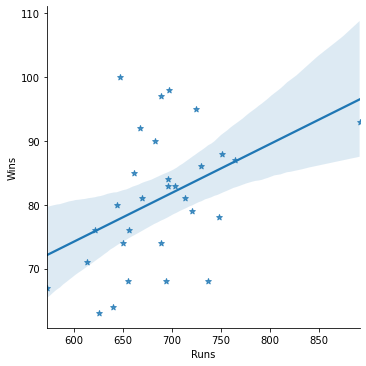

In [56]:
sns.lmplot(x='Runs' , y='Wins' , data=df, markers='*')

It is observed that 'Runs' is positively proportional to 'Wins'

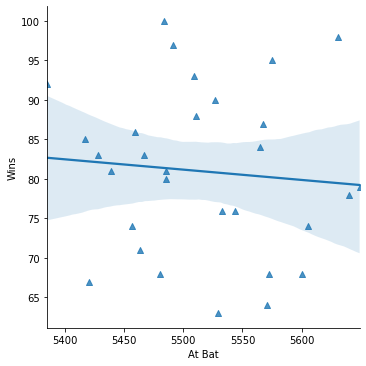

In [57]:
sns.lmplot(x='At Bat' , y='Wins' , data=df, markers='^')

It is observed that 'At Bat' is slightly negatively proportional to 'Wins'.

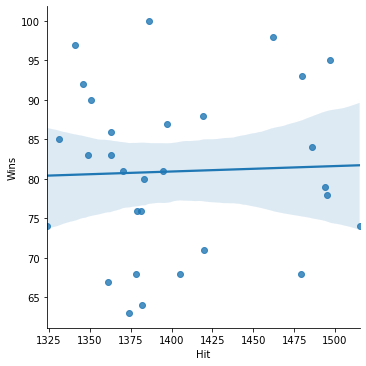

In [58]:
sns.lmplot(x='Hit' , y='Wins' , data=df, markers='o')

It is observed that 'Hit' is neither positively nor negatively proportional, that is we can say that there is less impact on 'Wins'.

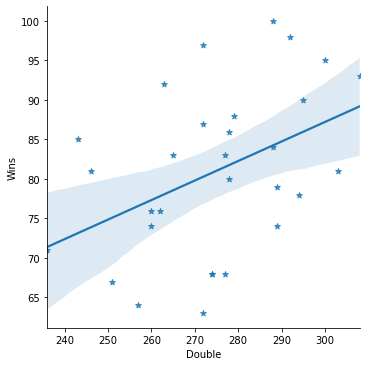

In [59]:
sns.lmplot(x='Double' , y='Wins' , data=df, markers='*')

It is observed that 'Double' is positively proportional to 'Wins'

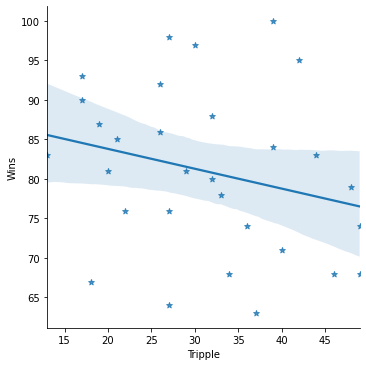

In [60]:
sns.lmplot(x='Tripple' , y='Wins' , data=df, markers='*')

It is observed that 'Tripple' is inversely proportional to 'Wins'.

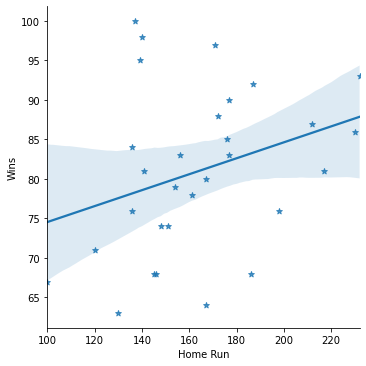

In [61]:
sns.lmplot(x='Home Run' , y='Wins' , data=df, markers='*')

It is observed that 'Home Run' is directly and positively proportional to 'Wins'.

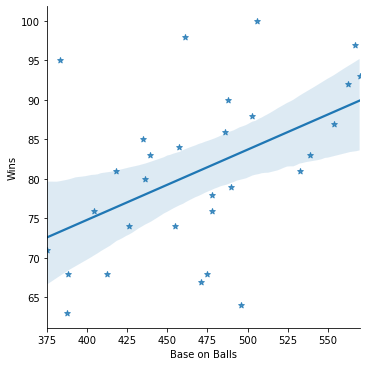

In [62]:
sns.lmplot(x='Base on Balls' , y='Wins' , data=df, markers='*')

It is observed that 'Base on Balls' is directly and positively proportional to 'Wins'.

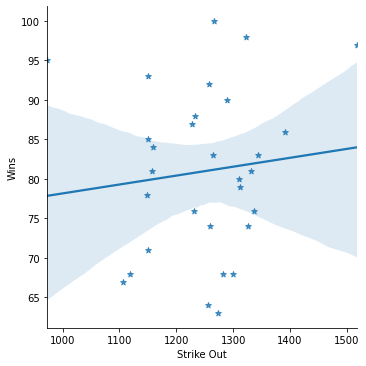

In [63]:
sns.lmplot(x='Strike Out' , y='Wins' , data=df, markers='*')

It is observed that 'Strike Out' is slightly positively proportional to 'Wins'.

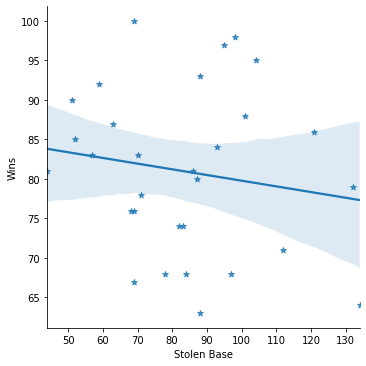

In [64]:
sns.lmplot(x='Stolen Base' , y='Wins' , data=df, markers='*')

It is observed that 'Stolen Base' is slightly negatively proportional to 'Wins'.

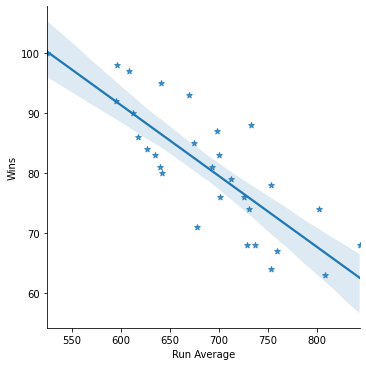

In [65]:
sns.lmplot(x='Run Average' , y='Wins' , data=df, markers='*')

It is observed that 'Run Average' is directly inversely proportional to 'Wins'.

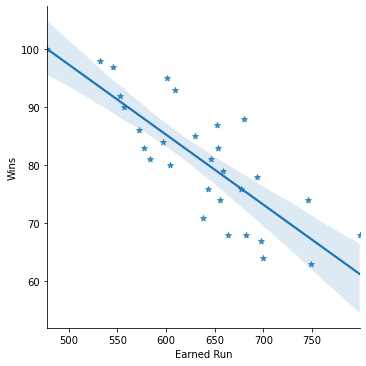

In [66]:
sns.lmplot(x='Earned Run' , y='Wins' , data=df, markers='*')

It is observed that 'Earned Run' is directly inversely proportional to 'Wins'.

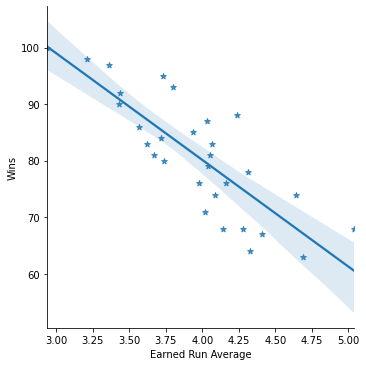

In [67]:
sns.lmplot(x='Earned Run Average' , y='Wins' , data=df, markers='*')

It is observed that 'Earned Run Average' is directly inversely proportional to 'Wins'.

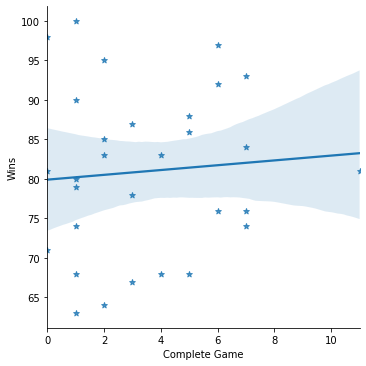

In [68]:
sns.lmplot(x='Complete Game' , y='Wins' , data=df, markers='*')

It is observed that 'Complete Game' is slightly directly proportional to 'Wins'.

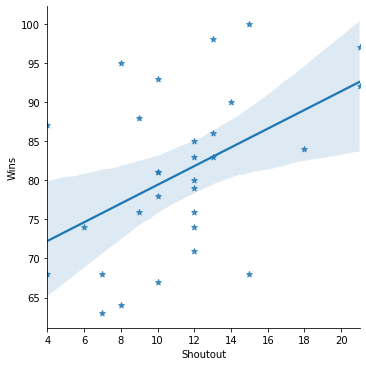

In [69]:
sns.lmplot(x='Shoutout' , y='Wins' , data=df, markers='*')

It is observed that 'Shoutout' is directly proportional to 'Wins'.

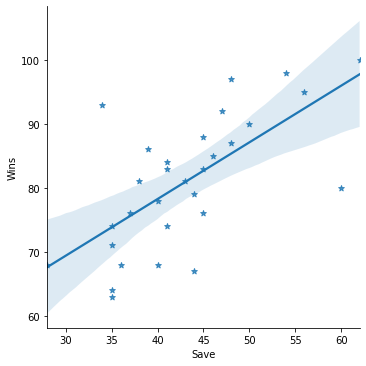

In [70]:
sns.lmplot(x='Save' , y='Wins' , data=df, markers='*')

It is observed that 'Save' is slightly directly proportional to 'Wins'.

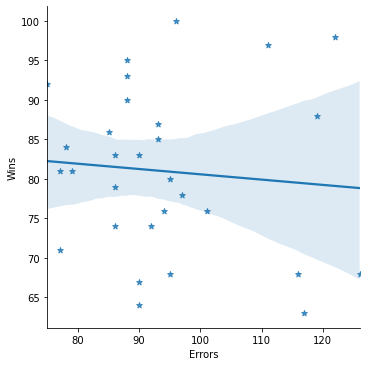

In [71]:
sns.lmplot(x='Errors' , y='Wins' , data=df, markers='*')

It is observed that 'Errors' is slightly inversely proportional to 'Wins'.

# Multivariate Analysis :

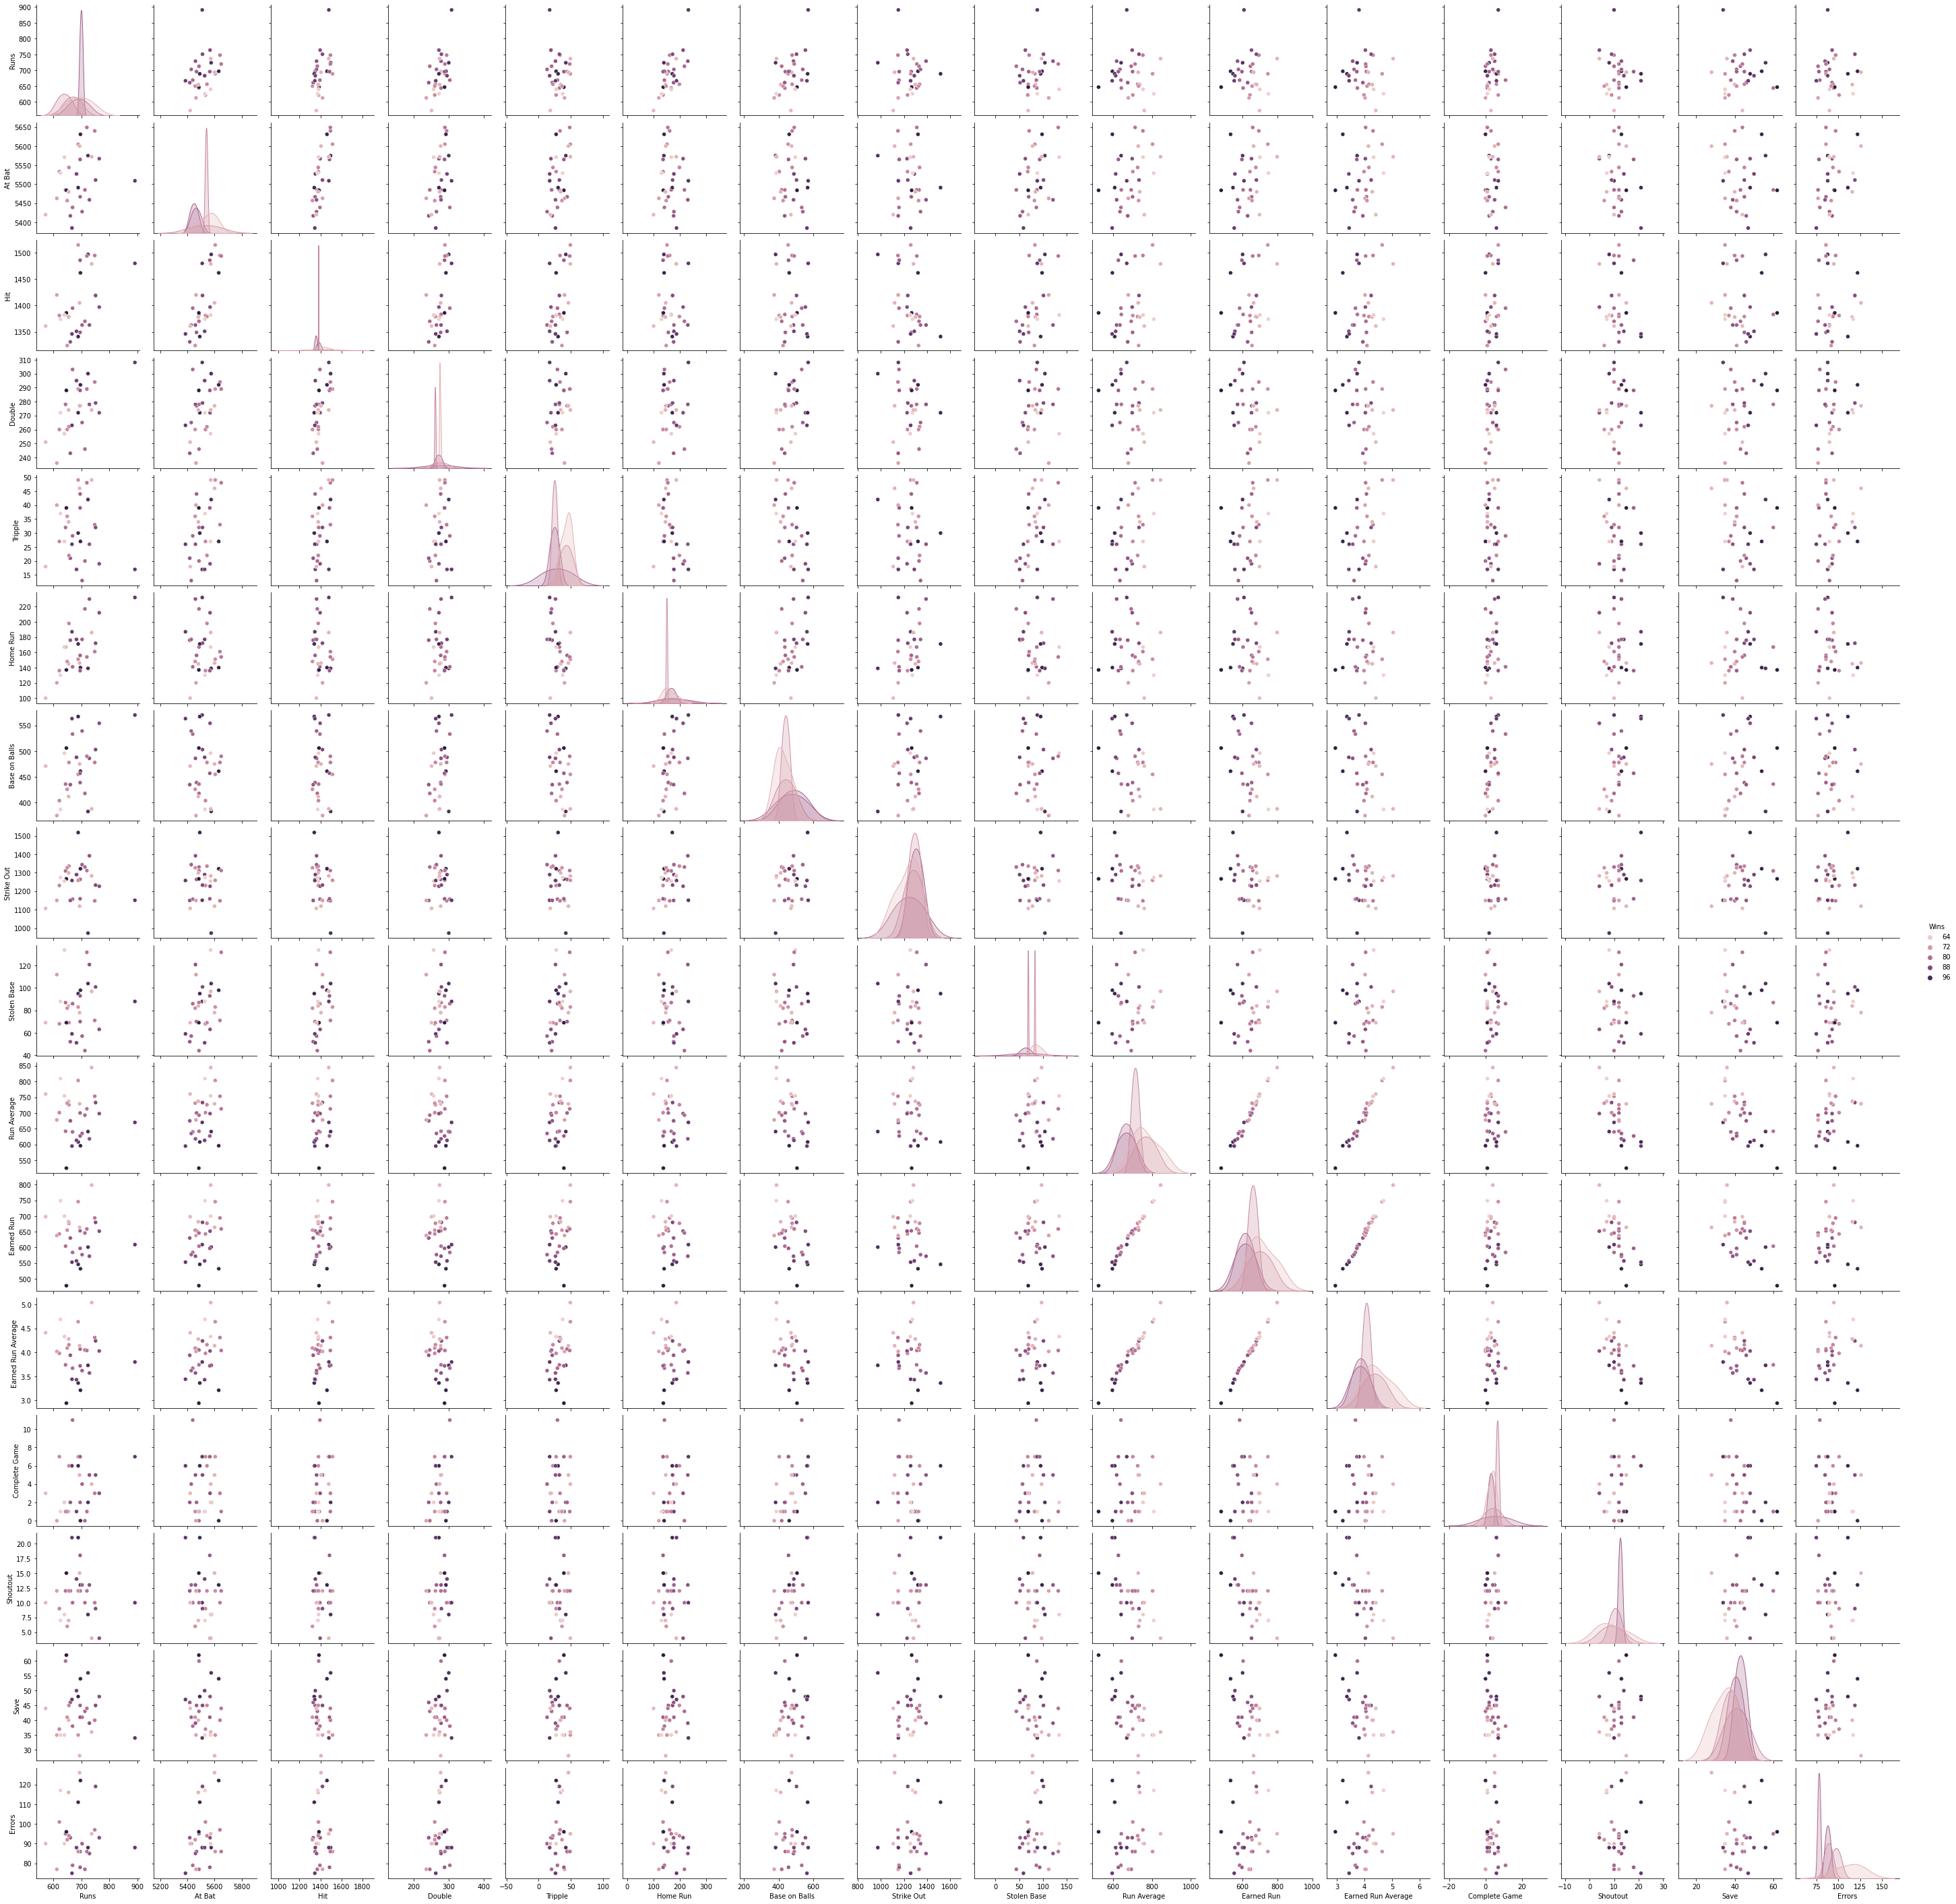

In [72]:
sns.pairplot(df, hue="Wins")

So that was all about our visualization, lets move further into the project.

# Detecting Outliers :

We have already seen in our univariate analysis that in some columns outliers are present. So lets recheck them :

<AxesSubplot:ylabel='Runs'>

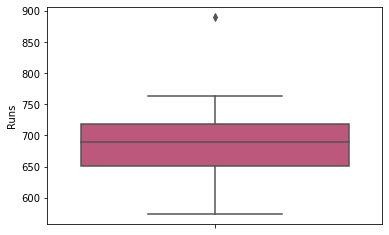

In [73]:
sns.boxplot(y='Runs', data=df, palette='plasma')

<AxesSubplot:ylabel='Earned Run Average'>

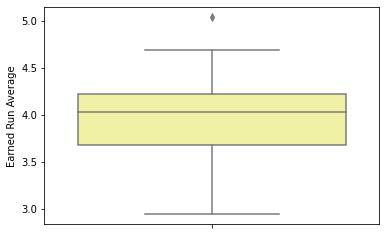

In [74]:
sns.boxplot(y='Earned Run Average', data=df, palette='terrain')

<AxesSubplot:ylabel='Shoutout'>

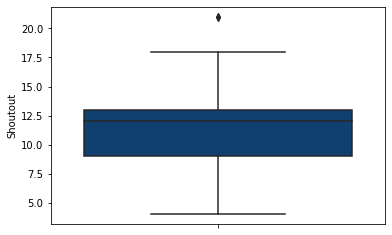

In [75]:
sns.boxplot(y='Shoutout', data=df, palette='ocean')

<AxesSubplot:ylabel='Save'>

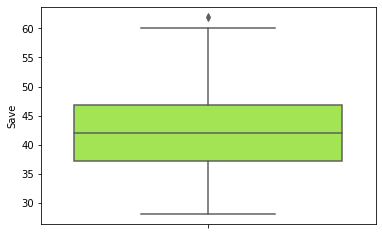

In [76]:
sns.boxplot(y='Save', data=df, palette='turbo')

<AxesSubplot:ylabel='Errors'>

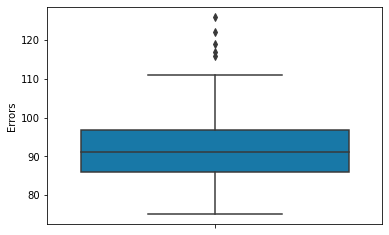

In [77]:
sns.boxplot(y='Errors', data=df, palette='winter')

Through this visualizations, the outliers are clearly visible.

And we need to remove them.

In [80]:
# Importing required zscore library

from scipy.stats import zscore
import numpy as np

In [82]:
z=np.abs(zscore(df))

In [85]:
threshold=3

In [86]:
df_new=df[(z<3).all(axis=1)] 

In [92]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (30, 17)


In [93]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (29, 17)


Here we can see the difference between our original df shape and df_new shape. There is not much difference, that means some outliers are still present. I am unable to remove further outliers, so would like to proceed with the later project.

# Variance Inflation Factor :

It helps us to eliminate multi co-linearity.

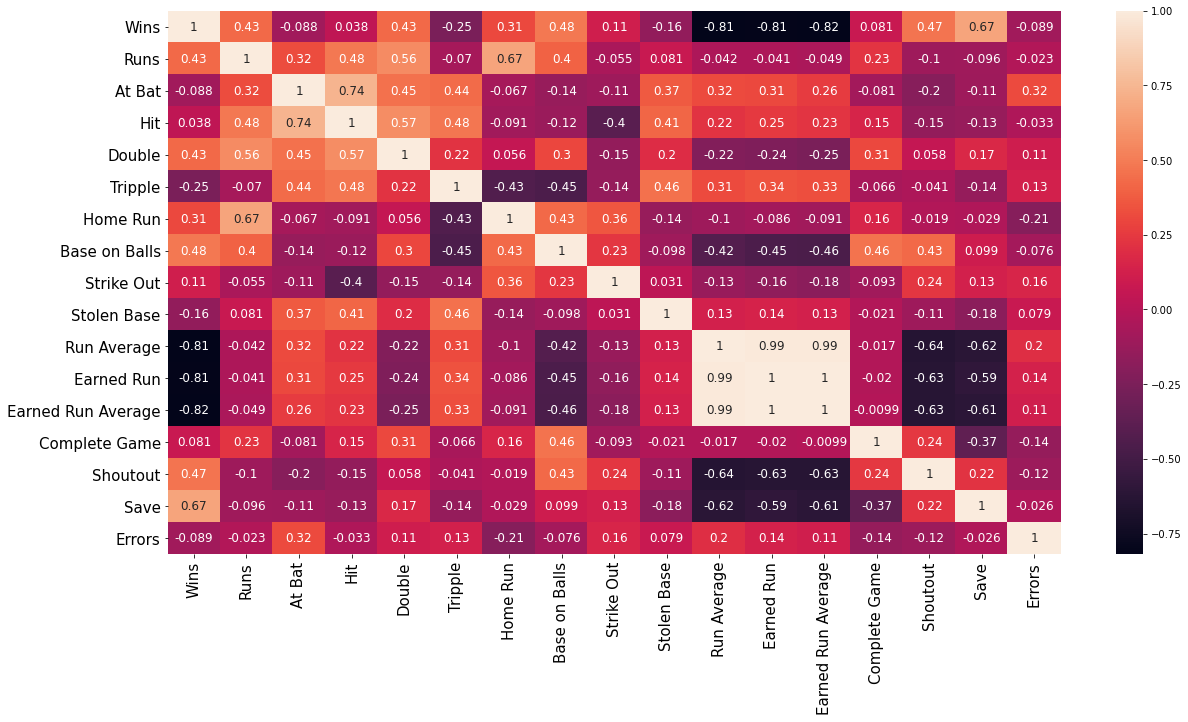

In [99]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
From here, we can find out the columns which are negatively correlated :
    
    1. [Run Average, Wins] are highly correlated.
    2. [Earned Run, Wins] are highly correlated.
    3. [Earned Run Average, Wins] are also highly correlated.

In [100]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Spliting the dataset

x=df.iloc[:,1:] # Data part
x.head()

,Runs,At Bat,Hit,Double,Tripple,Home Run,Base on Balls,Strike Out,Stolen Base,Run Average,Earned Run,Earned Run Average,Complete Game,Shoutout,Save,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [103]:
x.shape

(30, 16)

In [104]:
x.shape[1]

16

In [107]:
# Target

y=df.iloc[:,0]
y.head()

0    95
1    83
2    81
3    76
4    74
Name: Wins, dtype: int64

In [108]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [109]:
vif_calc()

      VIF Factor            Features
0    1638.985029                Runs
1    4277.157018              At Bat
2    4698.798408                 Hit
3     904.439835              Double
4      32.435486             Tripple
5     285.773237            Home Run
6     269.485018       Base on Balls
7     398.234104          Strike Out
8      28.654970         Stolen Base
9   17204.829356         Run Average
10  49837.289228          Earned Run
11  23551.544014  Earned Run Average
12      6.771036       Complete Game
13     30.276598            Shoutout
14    119.686080                Save
15     94.215202              Errors


Now, here we will find the highest values, which are 'Runs', 'At Bat', 'Hit', 'Run Average', 'Earned Run', 'Earned Run Average'.

But, 'Run Average', 'Earned Run', 'Earned Run Average' are highly correlated with 'Wins' as observed from the above heatmap.

So we need to check the individual impact on the target[Wins], from these attributes.

So, from the above heatmap, i observed that 'Run Average', 'Earned Run', 'Earned Run Average' has very less and negative impact on the target[Wins]. And hence we can drop them.

In [110]:
df.drop(["Earned Run", "Earned Run Average", "Run Average"], axis=1, inplace=True)

In [112]:
df.head()

,Wins,Runs,At Bat,Hit,Double,Tripple,Home Run,Base on Balls,Strike Out,Stolen Base,Complete Game,Shoutout,Save,Errors
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


In [115]:
# To recheck the VIF after dropping the columns

x=df.iloc[:,1:]

In [117]:
y=df.iloc[:,0]

In [118]:
x.shape

(30, 13)

In [119]:
x.shape[1]

13

In [121]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [122]:
vif_calc()

     VIF Factor       Features
0   1291.012792           Runs
1   3451.034047         At Bat
2   3637.937171            Hit
3    765.018703         Double
4     24.944533        Tripple
5    187.449869       Home Run
6    235.460101  Base on Balls
7    321.897751     Strike Out
8     23.730692    Stolen Base
9      6.287169  Complete Game
10    14.745259       Shoutout
11    62.136246           Save
12    75.200628         Errors


Now also there are some high co-linearity, but as we have already dropped 3 columns, so we will have to work with this only, so that these can go for the training and testing purpose.

# Feature Scaling :

To transform the dataset into same format, so that we have a uniform dataset.

In [124]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [127]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [128]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Runs,At Bat,Hit,Double,Tripple,Home Run,Base on Balls,Strike Out,Stolen Base,Complete Game,Shoutout,Save,Errors
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,-0.171757,-0.320914,-0.396360,0.194303


# Power Transformation :

I will use Yeo-Johnson to transform this continuous dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [129]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [130]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Runs,At Bat,Hit,Double,Tripple,Home Run,Base on Balls,Strike Out,Stolen Base,Complete Game,Shoutout,Save,Errors
0,0.723244,0.862884,1.461016,1.485428,1.038395,-0.777511,-1.593503,-2.543124,0.940948,-0.442233,-0.813734,1.529364,-0.331538
1,0.273208,-0.691487,-1.092615,0.076119,1.217528,-0.142580,-0.511802,0.124310,-0.556940,-0.442233,0.263305,0.377944,-0.539941
2,-0.237166,-1.138076,0.085384,1.679475,-0.186360,-0.699035,1.128963,-0.898428,0.213149,2.098834,-0.248363,-0.616578,-1.369919
3,-1.304238,0.292273,-0.226880,-0.844761,-0.387438,-0.896954,-1.181015,-0.199486,-0.661497,1.257526,-0.525158,-0.779619,0.691123
4,0.149227,1.252884,1.625558,0.792057,1.658117,-0.321408,-0.215233,0.074660,0.078840,1.257526,0.263305,-1.118967,-0.539941


Let's again check our VIF after power transformation

In [131]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [132]:
vif_calc()

    VIF Factor       Features
0     7.167278           Runs
1     3.695290         At Bat
2     5.356185            Hit
3     2.957367         Double
4     2.576953        Tripple
5     6.368427       Home Run
6     2.947924  Base on Balls
7     2.228060     Strike Out
8     1.791515    Stolen Base
9     2.140991  Complete Game
10    1.646486       Shoutout
11    1.687731           Save
12    1.702372         Errors


As we can observe here, after power transformation, the VIF values has reduced to a good exceptable range, and so we can proceed further with this dataset.

# Machine Learning Models :

Here we have a continuous dataset, hence we'll go with Linear Regression and various other regression models.

In [152]:
# Importing the necessary libraries :

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Spliting dataframe and finding best random state : 

In [136]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.9228929451591796 on random state 249


Hence we found our best random state value 249 with highest r2 score 0.92.

# Required Evaluation Metrices :

In [196]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=249)
# Here 30% will be used for testing purpose and rest 70% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [197]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 3.2082062002804044
r2 Score is: 92.28929451591796
Cross Validation Score: -36.538316168810944
Difference between r2 Score and Cross Validation Score is 128.8276106847289


I have tested different values for the test_size, but 0.25 gives the best score.

In [198]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 3.228881785303285
r2 Score is: 92.18958954299833
Cross Validation Score: -35.2485689278543
Difference between r2 Score and Cross Validation Score is 127.43815847085264


In [199]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 3.228408095555734
r2 Score is: 92.19188101120464
Cross Validation Score: -34.17312718841241
Difference between r2 Score and Cross Validation Score is 126.36500819961705


In [200]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 3.20940899233859
r2 Score is: 92.2835117742404
Cross Validation Score: -36.44953802914242
Difference between r2 Score and Cross Validation Score is 128.7330498033828


In [201]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 12.20870592973711
r2 Score is: -11.662882250299411
Cross Validation Score: -40.55042571933029
Difference between r2 Score and Cross Validation Score is 28.88754346903088


In [202]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 6.901535911628973
r2 Score is: 64.31702366699896
Cross Validation Score: 2.682620658932988
Difference between r2 Score and Cross Validation Score is 61.63440300806597


In [203]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 11.731988978258316
r2 Score is: -3.112866495404121
Cross Validation Score: -39.57828418258506
Difference between r2 Score and Cross Validation Score is 36.46541768718094


In [204]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 10.994316713648011
r2 Score is: 9.446330328924269
Cross Validation Score: -103.38357142132799
Difference between r2 Score and Cross Validation Score is 112.82990175025225


In [205]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 8.347454701883683
r2 Score is: 47.79913379374927
Cross Validation Score: -30.70973679332978
Difference between r2 Score and Cross Validation Score is 78.50887058707904


In [206]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 8.347454701883683
r2 Score is: 47.79913379374927
Cross Validation Score: -30.70973679332978
Difference between r2 Score and Cross Validation Score is 78.50887058707904


In [207]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 9.485245025478607
r2 Score is: 32.59894785935309
Cross Validation Score: -69.09665163820661
Difference between r2 Score and Cross Validation Score is 101.6955994975597


In [208]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 9.905554435797907
r2 Score is: 26.49326284027208
Cross Validation Score: -29.272434969186
Difference between r2 Score and Cross Validation Score is 55.76569780945808


In [209]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200)
reg(model,x,y)

Mean Square Error Score is: 8.907504560762234
r2 Score is: 40.5596066955402
Cross Validation Score: -34.99191602628142
Difference between r2 Score and Cross Validation Score is 75.55152272182161


After finding all the scores of various models, we found that Linear Regression model gives the highest r2 score. Hence we choose this model and proceed further with the process.

# Hyper Parameter Tuning :

Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of Linear Regression Model

In [ ]:
LinearRegression(
    fit_intercept=True, False
    normalize=True, False,
    copy_X=True, False,
    n_jobs=-2, -1, 1,
    positive=False, True
)

These are the various parameters for linear regression, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [187]:
params={'fit_intercept':[True, False],
    'normalize':[True, False],
    'copy_X':[True, False],
    'n_jobs':[-2, -1, 1],
    'positive':[False, True]}

In [188]:
grid=GridSearchCV(LinearRegression(), params, cv=5)

In [189]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [False, True]})

In [190]:
grid.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': True,
 'positive': True}

So here we have found the best parameters for our model, and now we can finally train our model.

In [191]:
linear=LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=True, positive=True)

In [192]:
linear.fit(x_train,y_train)
pred_lin=linear.predict(x_test)
r2=r2_score(y_test, pred_lin)*100
print('r2 score for the final model : ',r2)

r2 score for the final model :  71.45758750275091


In [193]:
linear.coef_

array([4.79794251, 0.        , 0.        , 1.24430179, 0.        ,
       0.        , 1.30820063, 0.        , 0.        , 1.37810691,
       2.69781406, 6.64581065, 0.79015479])

In [195]:
linear.intercept_

80.28063772853899

# Saving the best model :

In [210]:
import pickle
filename='Best_model_for_Baseball.pkl'
pickle.dump(linear,open(filename,'wb'))